# MNIST Handwritten Digits Recognizer

A deep learning project implementing an Artificial Neural Network using TensorFlow's Functional API to classify handwritten digits from the MNIST dataset. The model features multiple hidden layers with advanced regularization techniques and achieves high accuracy in digit recognition.

**Features:**
- Functional API implementation
- 4-layer deep architecture
- BatchNormalization & Dropout
- Comprehensive evaluation metrics

**Performance:** about 97% test accuracy

**Tech Stack:** TensorFlow, Keras, Python, Matplotlib

# 1. Importing Dependencies

All required Python libraries for data manipulation, visualization, and model creation are imported:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist as mnist_dataset
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


# 2. Loading the Dataset

The MNIST dataset is fetched directly from Tensorflow:

In [2]:
mnist = mnist_dataset.load_data()

print("✅ Dataset fetched successfully!")

✅ Dataset fetched successfully!


# 3. Splitting the Data

The dataset is split into training and testing sets:

In [3]:
(x_train, y_train), (x_test, y_test) = mnist

print("\nTrain set size: ")
print(x_train.shape[0])
print("Test set: ")
print(x_test.shape[0])


Train set size: 
60000
Test set: 
10000


# 4. Visualizing Sample Digits

Sample images is displayed using Matplotlib:

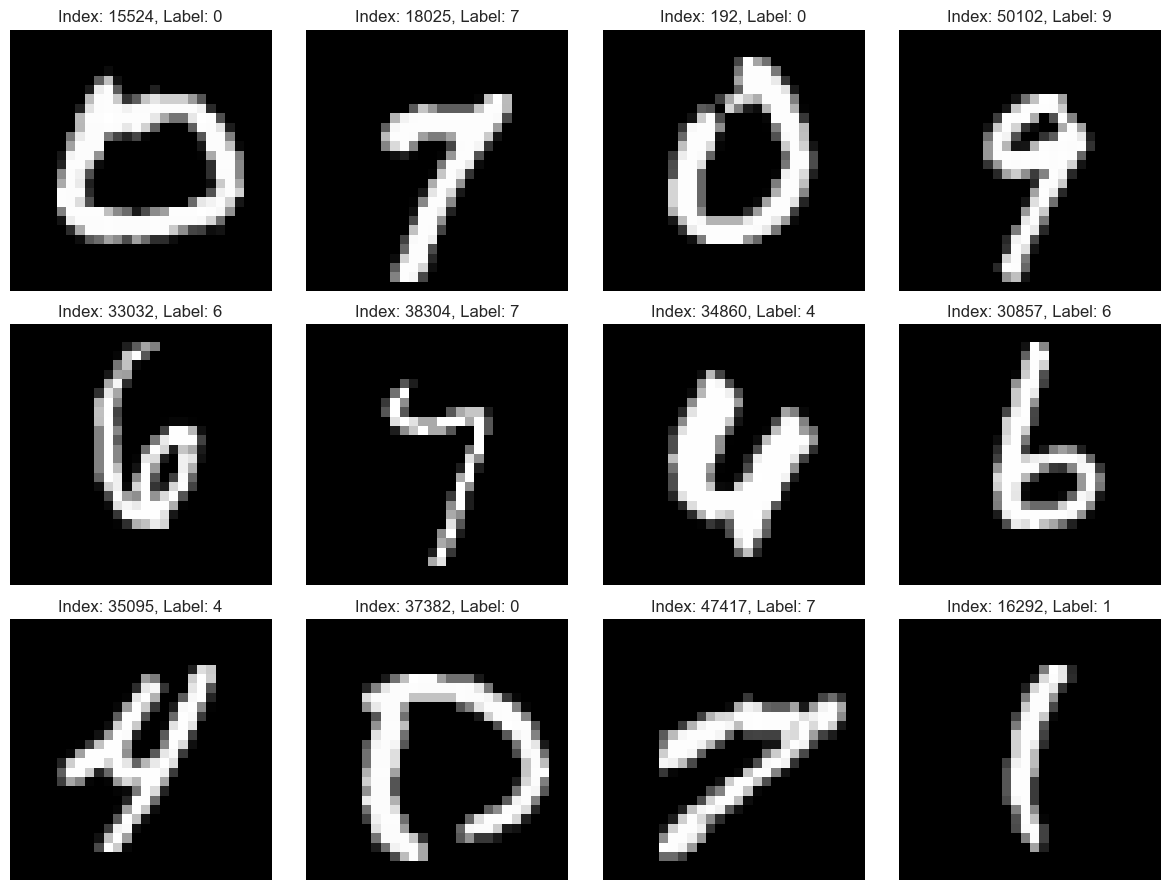

In [4]:
random_indices = np.random.choice(len(x_train), 12, replace=False)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(f"Index: {idx}, Label: {y_train[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# 5. Class Distribution

The notebook visualizes how often each digit appears:

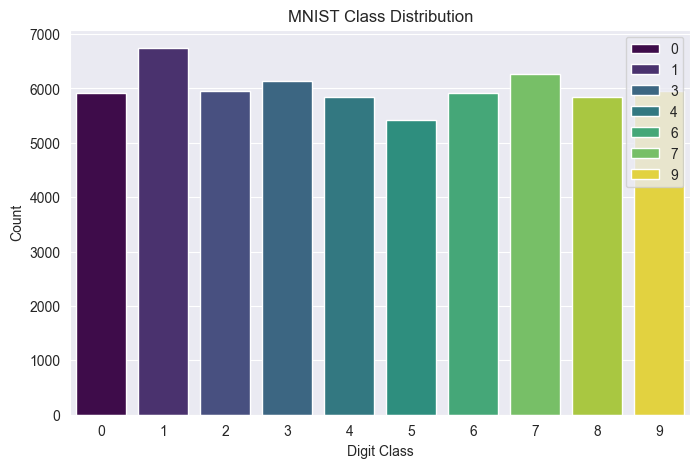


Class Distribution: 
Class 0: 5923 (9.87)%
Class 1: 6742 (11.24)%
Class 2: 5958 (9.93)%
Class 3: 6131 (10.22)%
Class 4: 5842 (9.74)%
Class 5: 5421 (9.04)%
Class 6: 5918 (9.86)%
Class 7: 6265 (10.44)%
Class 8: 5851 (9.75)%
Class 9: 5949 (9.92)%


In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, hue=y_train, palette="viridis")
plt.title("MNIST Class Distribution")
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.show()

print("\nClass Distribution: ")

unique, counts = np.unique(y_train, return_counts=True)
for i, c in enumerate(counts):
    print(f"Class {i}: {c} ({c / len(y_train) * 100:.2f})%")


# 6. Preprocess the data

In [6]:
# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32')

# Normalize pixel values to [0, 1]
x_train /= 255.0
x_test /= 255.0

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Labels shape: {y_train.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)
Labels shape: (60000,)


# 7. Building the Neural Network


In [7]:
input_layer = Input(shape=(784,), name='input_layer')

# First hidden layer with BatchNormalization and Dropout
layer_1 = Dense(512, activation='relu', kernel_regularizer=l2(0.001), name='layer_1')(input_layer)
batch_norm_1 = BatchNormalization(name='batch_norm_1')(layer_1)
dropout_1 = Dropout(0.3, name='dropout_1')(batch_norm_1)

# Second hidden layer
layer_2 = Dense(256, activation='relu', kernel_regularizer=l2(0.001), name='layer_2')(dropout_1)
batch_norm_2 = BatchNormalization(name='batch_norm_2')(layer_2)
dropout_2 = Dropout(0.3, name='dropout_2')(batch_norm_2)

# Third hidden layer
layer_3 = Dense(128, activation='relu', kernel_regularizer=l2(0.001), name='layer_3')(dropout_2)
batch_norm_3 = BatchNormalization(name='batch_norm_3')(layer_3)
dropout_3 = Dropout(0.3, name='dropout_3')(batch_norm_3)

# Fourth hidden layer
layer_4 = Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='layer_4')(dropout_3)
batch_norm_4 = BatchNormalization(name='batch_norm_4')(layer_4)
dropout_4 = Dropout(0.3, name='dropout_4')(batch_norm_4)

# Fifth hidden layer
layer_5 = Dense(32, activation='relu', kernel_regularizer=l2(0.001), name='layer_5')(dropout_4)

output_layer = Dense(10, activation='softmax', name='output_layer')(layer_5)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_4                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 580,650 (2.22 MB)

 Trainable params: 578,730 (2.21 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [8]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
scce = SparseCategoricalCrossentropy()
model.compile(loss=scce, optimizer=adam, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6427 - loss: 2.2015 - val_accuracy: 0.9310 - val_loss: 1.0346
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9429 - loss: 0.9408 - val_accuracy: 0.9653 - val_loss: 0.6867
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9565 - loss: 0.6837 - val_accuracy: 0.9654 - val_loss: 0.5355
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9619 - loss: 0.5281 - val_accuracy: 0.9680 - val_loss: 0.4248
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9639 - loss: 0.4300 - val_accuracy: 0.9732 - val_loss: 0.3495
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9668 - loss: 0.3681 - val_accuracy: 0.9694 - val_loss: 0.3234
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9686 - loss: 0.3237 - val_accuracy: 0.9697 - val_loss: 0.2964
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9687 - loss: 0.3002 - val_accuracy: 0.

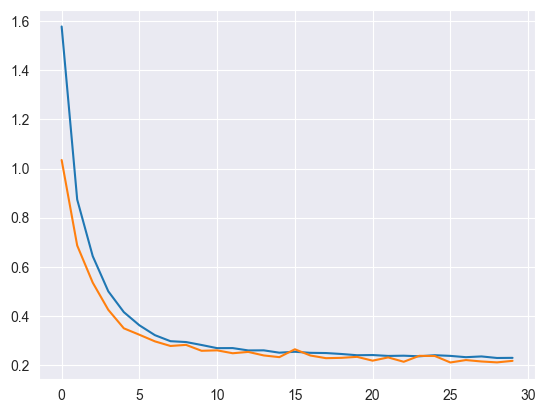

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

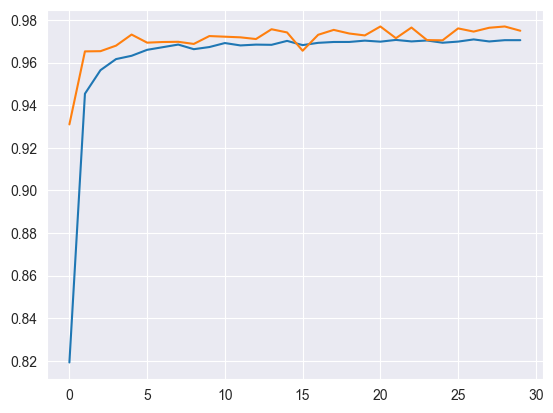

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# 8. Evaluate the Model

In [12]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))



Test Accuracy: 0.9750
Test Loss: 0.2171
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.99      0.95      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



In [13]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Confusion Matrix:
[[ 970    1    1    1    0    0    1    5    1    0]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   4    2 1011    4    1    0    2    8    0    0]
 [   0    0    5  992    0    2    0    6    2    3]
 [   2    2    4    1  940    0    5    2    2   24]
 [   3    0    0   14    0  867    4    1    2    1]
 [  16    2    1    2    2    5  928    1    1    0]
 [   1    5    9    2    0    0    0 1009    1    1]
 [  12    2    6   11    0    2    7    8  921    5]
 [   5    2    0    3    7    2    0    4    0  986]]


# 9. Model Performance Summary

In [21]:
def print_model_performance_summary(model, history, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    print("=" * 50)
    print("MODEL PERFORMANCE SUMMARY")
    print("=" * 50)
    print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Number of Epochs: {len(history.history['accuracy'])}")
    print(f"Total Parameters: {model.count_params():,}")
    print("=" * 50)

# Print performance summary
print_model_performance_summary(model, history, x_test, y_test)

MODEL PERFORMANCE SUMMARY
Final Training Accuracy: 0.9706
Final Validation Accuracy: 0.9750
Test Accuracy: 0.9750
Test Loss: 0.2171
Number of Epochs: 30
Total Parameters: 580,650


### Key Features of This ANN Functional Model:
Functional API: Uses TensorFlow's Functional API for flexibility

Deep Architecture: 4 hidden layers with decreasing neurons (512 → 256 → 128 → 64)

Regularization: Dropout and BatchNormalization to prevent overfitting

Comprehensive Evaluation: Multiple metrics and visualizations

Model Interpretation: Feature importance and activation analysis

Modular Design: Easy to modify and extend